# Automating Dataset Handling in R

In this tutorial, we explore a practical and efficient approach to getting started with a data science project in R: automating the download, unzipping, and loading of datasets. This process not only saves time but also introduces you to the concept of functions in R—a fundamental skill for any aspiring data scientist.

### Why Create a Custom Function?

- **Time-saving:** Automating repetitive tasks like downloading, unzipping, and loading datasets saves a significant amount of time.
- **Skill Enhancement:** Building a custom function for these tasks is not only practical for any data science project but also an excellent way to understand the power and flexibility of functions in R.

### Tutorial Overview

This tutorial walks you through creating a custom function to automate the process of handling the Student Performance dataset from the UCI Machine Learning Repository. Here's what we'll cover:

1. **Creating a Function in R:** We'll start by defining a custom function tailored to automate the download, unzip, and load process.
2. **Automating Dataset Handling:** We'll use the Student Performance dataset as a case study to demonstrate how the function works in practice.
3. **Enhancing R Data Science Skills:** Through this process, you'll gain a deeper understanding of how functions in R can be used to streamline your data science skills with R.


## Creating a Function in R

To create a function in R, you use the `function()` keyword. The basic syntax of a function is as follows:

```R
my_function <- function(arg1, arg2, ...) {
  # Function body
  # Code to execute
  # Return a
```


Let's create a very simple function that adds two numbers together. This function will take two arguments (the numbers to be added) and will return their sum. value
}

In [1]:
add_numbers <- function(number1, number2) {
  sum <- number1 + number2
  return(sum)
}

To use the `add_numbers` function, follow these steps:

1. **Call the Function:** Start by writing the name of the function you want to use, in this case, `add_numbers`.

2. **Provide Arguments:** Next, provide the values (arguments) for `number1` and `number2` inside parentheses, separated by a comma. For example, to add 5 and 3, you would write `add_numbers(5, 3)`.

3. **Capture the Result:** The function returns a value, which you can assign to a variable or use directly. To save the result of adding 5 and 3 into a variable called `result`, you would write `result <- add_numbers(5, 3)`.

4. **Display the Result:** Finally, you can view the result by printing the variable `result` using the `print()` function, like so: `print(result)`.



In [2]:
result <- add_numbers(11, 3)
print(result)


[1] 14


## Exploring the Hitters Dataset for Regression Analysis

In our journey through machine learning techniques, we're utilizing the `Hitters` dataset provided by the `ISLR` package. This dataset offers a wealth of information suitable for regression analysis tasks.

The `Hitters` dataset revolves around professional baseball players and encompasses various attributes related to their performance and salaries. Some of the features included in the dataset are:

- Player statistics: `AtBat` (number of times at bat), `Hits` (number of hits), `HmRun` (number of home runs), `Runs` (number of runs scored), `RBI` (number of runs batted in), `Walks` (number of walks), etc.
- League affiliation: `LeagueA` (American League), `LeagueN` (National League).
- Division within the league: `DivisionW` (Western Division).

These attributes provide a comprehensive view of a player's performance and background, making the `Hitters` dataset an excellent resource for regression analysis tasks.

The `ISLR` package's datasets, including `Hitters`, are renowned for their suitability in statistical learning and machine learning applications. They offer real-world data scenarios, enabling practical application of various machine learning techniques.

By leveraging the `Hitters` dataset in our course materials, we aim to provide you with a hands-on learning experience that not only enhances your theoretical understanding but also equips you with practical skills for real-world data analysis in R. Let's dive into loading the `Hitters` dataset and uncovering insights through regression analysis!

<span style="color:red; font-weight:bold; font-size:small;">
- Note for Class: On purpose, we are not relying on career statistics variables. (You will see later why)
</span>




# Understanding Data Preparation Workflow

Let's walk through what we're doing here step by step:

- First off, we load up the ISLR library. This is where we get all our cool datasets and functions for learning stats in R.
- Then, we dive into the Hitters dataset. Imagine it like a treasure trove of info about baseball players – stats, salaries, the works.
- But hey, we gotta clean first! We sift out any rows with missing info (NA) so our data's squeaky clean.
- Next up, we're getting serious with predictions. We create this fancy matrix called X, packed with potential predictors that could help us predict a player's salary. No intercept term here – just straight-up predictors.
- Now, we're bringing X into the real world by turning it into a dataframe named 'data'. Think of it like giving shape to our predictions.
- But wait, we're not done yet! We need to add in the salary info from the original dataset. So, we tack on the Salary column from Hitters onto our 'data' dataframe. Now, we're cooking with gas!
- Just to keep things neat and tidy, we strip away any row names. No clutter here!
- Oh, and we've also removed the "NewLeague" column from our dataframe to focus on the relevant predictors.
- Lastly, to ensure our dataset is free from any missing values, we've removed any remaining rows with NA values.

Pretty cool, huh? Now our data is primed and ready for some serious analysis!


In [1]:
# Load the ISLR library
library(ISLR)

# Access the Hitters dataset
data(Hitters)

# Remove rows with NA values to ensure clean data
HittersClean <- na.omit(Hitters)

# Prepare the predictors matrix without intercept
X <- model.matrix(Salary ~ . - 1, data = HittersClean) # Preparing predictors

# Convert the matrix to a dataframe
data <- as.data.frame(X)

# Append the Salary as outcome variable
data$salary <- HittersClean$Salary


# Remove row names

rownames(data) <- NULL

# Now 'data' is a dataframe that includes both predictors and the outcome variable

data = as.data.frame(data)

# LeagueN
# Remove the NewLeague column
data <- data[, !names(data) %in% "NewLeague"]

# Remove rows with missing values
data <- na.omit(data)



## Splitting Data for Machine Learning

Splitting your data into training and testing sets is crucial for assessing the performance of your machine learning models. This step helps you understand how well your model generalizes to new, unseen data. Below is a basic method to split data in R:


In [2]:

# Set the seed for reproducibility
set.seed(123)

# Calculate the size of the training set
split_ratio = 0.8
training_size <- floor(nrow(data) * split_ratio)

# Randomly sample row indices for the training set
training_indices <- sample(seq_len(nrow(data)), size = training_size)

# Create the training set
train <- data[training_indices, ]

# Create the test set
test <- data[-training_indices, ]


Splitting Data into Train and Test Sets
In machine learning, it's crucial to evaluate the performance of your models on unseen data to ensure they can generalize well. One common practice is to split your dataset into separate train and test sets. In this tutorial, we'll walk through how to split your data using R for three different regression methods: Ordinary Least Squares (OLS), Lasso, and Ridge regression.

<span style="color:red; font-weight:bold; font-size:xx-large;">
# Time for a breakout session 
</span>


# Estimating Linear Regression to Predict Salary

Let's dive into estimating a linear regression model to predict baseball players' salaries. Here's what we're up to:

- We're aiming to understand how various factors influence a player's salary. So, we're fitting a linear regression model using the `lm()` function in R.
- This function helps us find the best-fitting line that explains the relationship between a player's salary (our dependent variable) and all the other factors we think might matter (our independent variables).
- After we fit our model, it's time to put it to the test! We'll predict salaries for players in our test dataset and see how well our model does.
- To measure how accurate our predictions are, we'll calculate something called the Mean Squared Error (MSE). This tells us, on average, how far off our predictions are from the actual salaries.
- The lower the MSE, the better our model is at predicting salaries accurately.

Let's jump into the code and see how it all plays out:
lays out:


In [3]:
library(glmnet)
library(dplyr)

# Fit the linear regression model
ols <- lm(salary ~ ., data = train)
# Display the summary of the model to understand its performance
summary(ols)

# Predicting the salary for the test dataset
ols$predict_outcome <- predict(ols, newdata = test)

# Calculating the Mean Squared Error (MSE) for our predictions
predMSEols <- mean((test$salary - ols$predict_outcome)^2)
# Print the MSE to the console
print(predMSEols)

Loading required package: Matrix

Loaded glmnet 4.1-8


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





Call:
lm(formula = salary ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-753.89 -173.98  -11.87  159.32 1815.62 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  214.09783  124.12599   1.725  0.08618 . 
AtBat         -1.68499    0.75317  -2.237  0.02644 * 
Hits           5.06495    2.89376   1.750  0.08168 . 
HmRun         -2.68840    6.86520  -0.392  0.69579   
Runs          -0.95353    3.41442  -0.279  0.78034   
RBI            1.41046    3.00406   0.470  0.63924   
Walks          6.35620    2.11308   3.008  0.00299 **
Years        -13.14742   14.12616  -0.931  0.35318   
CAtBat        -0.25953    0.15700  -1.653  0.09996 . 
CHits          0.65158    0.80755   0.807  0.42076   
CHmRun         1.29483    1.86077   0.696  0.48737   
CRuns          1.25425    0.89170   1.407  0.16119   
CRBI           0.46318    0.84092   0.551  0.58242   
CWalks        -0.68669    0.39171  -1.753  0.081

Warning message in predict.lm(ols, newdata = test):
“prediction from a rank-deficient fit may be misleading”


[1] 138149.8


# Estimating Lasso and Ridge Regression Models

Alrighty, let's expand our horizons and dive into Lasso and Ridge regression models. Here's the plan:

- First up, we'll fit a Lasso regression model. Lasso (short for Least Absolute Shrinkage and Selection Operator) is like a regular linear regression model, but with a twist – it adds a penalty term to shrink some coefficients to zero. This helps us deal with multicollinearity and perform variable selection.
- We're using the `glmnet()` function in R to estimate our Lasso model. We're using salary as our outcome variable.
- But wait, how do we know if our Lasso model is any good? That's where cross-validation comes in! We'll use `cv.glmnet()` to perform cross-validation and find the optimal lambda value. Lambda is the tuning parameter that controls the amount of shrinkage in our model. We want to find the lambda that gives us the lowest Mean Squared Error (MSE) on our validation data.
- We'll perform 5-fold cross-validation, meaning we split our data into 5 parts, train our model on 4 parts, and test it on the remaining part. We do this 5 times, rotating which part is the validation set each time.
- Once we have our optimal lambda value, we'll have a solid Lasso model ready to make some killer predictions!

Let's rock and roll with the code:


## Advancing to Lasso Regression: Streamlining Predictive Analysis

In this stage, we upgrade our regression technique to Lasso regression, introducing a penalty (`alpha = 1`) to enhance model precision. We start by leveraging the Lasso constraint to minimize residual error and shrink regression coefficients. Our goal remains clear: predict `train$salary` values based on specified predictors. After this, we'll delve into visualizing our regression insights for clearer interpretation.


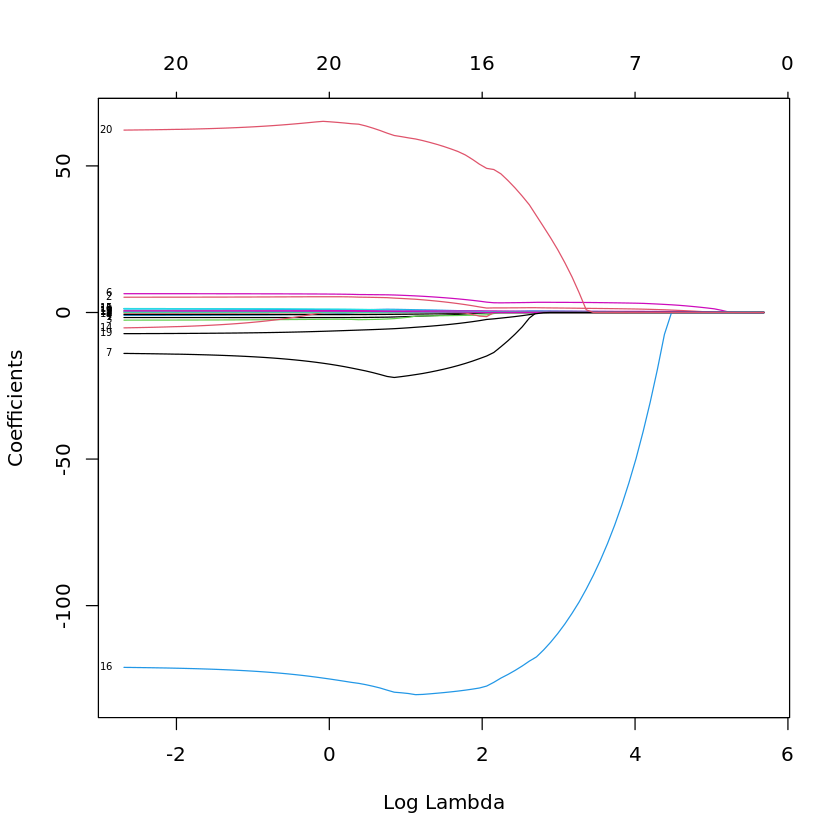

In [4]:
# Estimate a Lasso model using all predictors except the outcome variable
lasso <- glmnet(as.matrix(train[, -ncol(train)]), train$salary, alpha = 1)

plot(lasso, xvar = "lambda", label = TRUE)



The plot showcases Lasso regression's journey with predictors from the Hitters dataset. As the log lambda value increases, coefficients shrink towards zero—a hallmark of Lasso for feature selection and regularization. Initially, with lower lambda, most coefficients remain non-zero, but as lambda rises, more coefficients become zero, simplifying the model. The top numbers indicate the quantity of active predictors at different lambda thresholds.

## Optimizing Regularized Regression: Tuning $\lambda$ through Cross-Validation

In the realms of Lasso and Ridge regression, the penalty term $\lambda$ is pivotal for balancing model complexity and prediction accuracy. Mastering the selection of $\lambda$ necessitates a firm grasp of cross-validation techniques and the variance-bias trade-off, core concepts in statistical learning.

### The Cross-Validation Process

Cross-validation (CV) stands as a robust method for gauging the predictive performance of statistical models and fine-tuning parameters like $\lambda$. Here's how CV facilitates this process:

1. **Partitioning**: The dataset splits into $k$ equally sized folds, ensuring each data point tests against a model trained on unseen data—a crucial step for assessing model generalizability.

2. **Grid of $\lambda$ Values**: A comprehensive range of $\lambda$ values explores, seeking the optimal balance between model complexity and predictive accuracy.

3. **Model Training and Validation**: Each $\lambda$ undergoes iterative training on $k-1$ folds and testing on the remaining fold. Metrics like Mean Squared Error (MSE) evaluate model performance.

4. **Average Prediction Errors**: Across all folds for each $\lambda$, average errors accumulate, revealing the model's performance under varying levels of regularization.

5. **Selecting $\lambda$**: The optimal $\lambda$ minimizes cross-validated prediction error. Alternatively, the one-standard-error rule selects the simplest model with an error within one standard deviation of the lowest error.

### Grasping the Variance-Bias Trade-off

Understanding the variance-bias trade-off is pivotal when tuning $\lambda$:

- **High Bias**: Oversimplified models (high bias) struggle to capture complex patterns, leading to underfitting and poor performance.

- **High Variance**: Overly complex models (high variance) capture random noise, resulting in overfitting and poor generalization.

- **Balancing with $\lambda$**: The regularization parameter $\lambda$ modulates this trade-off. As $\lambda$ increases, model complexity decreases, reducing variance but potentially increasing bias.

#### Linking to Cross-Validation

Cross-validation plays a pivotal role in navigating this trade-off:

- **Model Evaluation**: Estimates model error on unseen data, ensuring robust performance beyond the training set.

- **Optimal $\lambda$ Selection**: Identifies $\lambda$ minimizing validation set error, guarding against overfitting and ensuring generalization.

- **Visualizing Trade-off**: Provides a validation curve illustrating MSE for various $\lambda$ values, pinpointing the optimal balance.

Before diving in, establishing a seed for replicability ensures consistent and reproducible results.


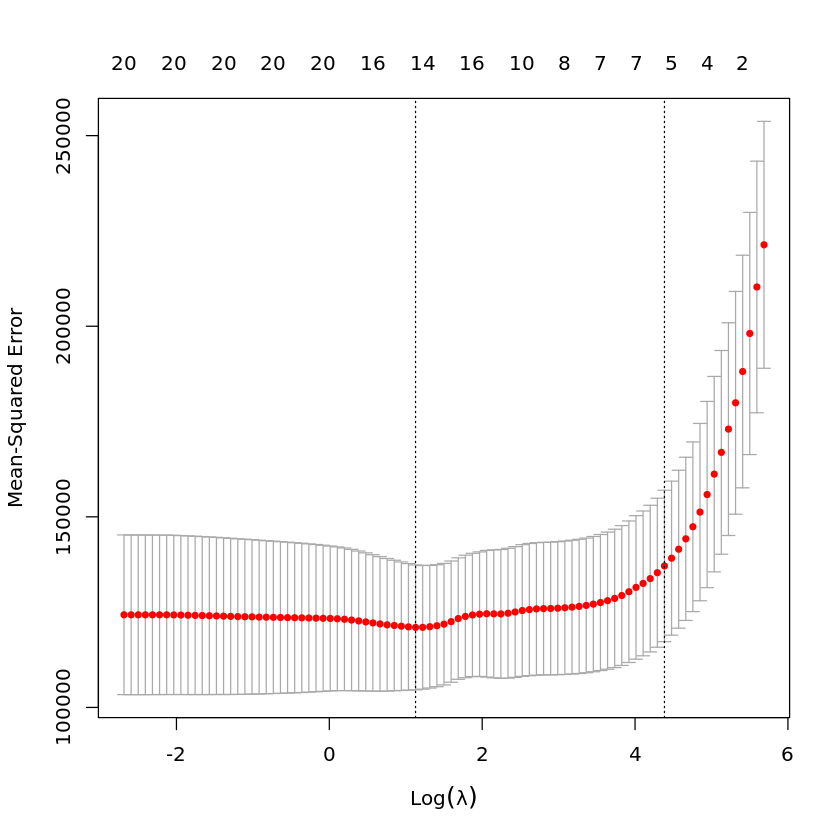

In [5]:
# Perform cross-validation to find the optimal lambda value
lasso.cv <- cv.glmnet(as.matrix(train[, -ncol(train)]), train$salary, type.measure = "mse", nfolds = 5, alpha = 1)

# Plot the cross-validation results
plot(lasso.cv)


## Deciphering the Bias-Variance Trade-off through Visualization

The cross-validation plot serves as a visual compass, guiding our understanding of the bias-variance trade-off within Lasso regression:

- **High Bias**: Rightmost \( $\lambda$ \) values signify a model with elevated bias, indicating simplicity that may overlook data intricacies, potentially leading to increased training errors.

- **High Variance**: Conversely, lower \( $\lambda$ \) values on the left suggest a model with reduced bias but heightened variance, closely fitting the training data and risking overfitting.

- **Optimal \( $\lambda$ \) Spotting**: Nestled at the plot's nadir lies the optimal \( $\lambda$ \), striking a harmonious balance between bias and variance, minimizing mean squared error (MSE) across cross-validation folds.

- **MSE Minimization**: Pinpointing \( $\lambda$ \) associated with the lowest MSE hones in on superior model performance for unseen data.

- **One-Standard-Error Rule**: For a cautious approach, adopting the one-standard-error rule selects the largest \( $\lambda$ \) within one standard error above the minimum MSE, fostering a model less prone to overfitting.

This visual journey empowers us to make informed decisions, ensuring our Lasso regression model strikes the perfect equilibrium between simplicity and predictive power.


## Analyzing Lasso Coefficients and Calculating train Sample MSE

In the code snippet below, we examine the coefficients of the Lasso model corresponding to the optimal lambda value determined through cross-validation. In Lasso regression, certain coefficients may take on a value of zero, indicating that the associated control variables are excluded from the model. This property of Lasso aids in simplifying the model by removing less relevant variables, thereby enhancing interpretability and generalization to unseen data.


In [6]:
# Print Lasso coefficients
print(coef(lasso.cv, s = "lambda.min"))

# Save for later comparison
coef_lasso <- coef(lasso.cv, s = "lambda.min") 


21 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  166.11443720
AtBat         -1.30757875
Hits           4.51968561
HmRun         -1.24552249
Runs           .         
RBI            0.03960154
Walks          5.65969190
Years        -21.19283958
CAtBat         .         
CHits          .         
CHmRun         0.93654412
CRuns          0.73819832
CRBI           0.52999554
CWalks        -0.55639966
LeagueA        .         
LeagueN        .         
DivisionW   -130.37282650
PutOuts        0.16553326
Assists        0.27281649
Errors        -5.04314148
NewLeagueN    59.18533783


<span style="color:red; font-weight:bold; font-size:xx-large;">
# Time for a breakout session 
</span>


# Transitioning to Ridge Regression: Enhancing Predictive Analysis

In this stage, we transition our regression methodology to Ridge regression, implementing a penalty (`alpha = 0`) to refine model accuracy.  Following this, we'll embark on visualizing our regression findings for enhanced comprehension.

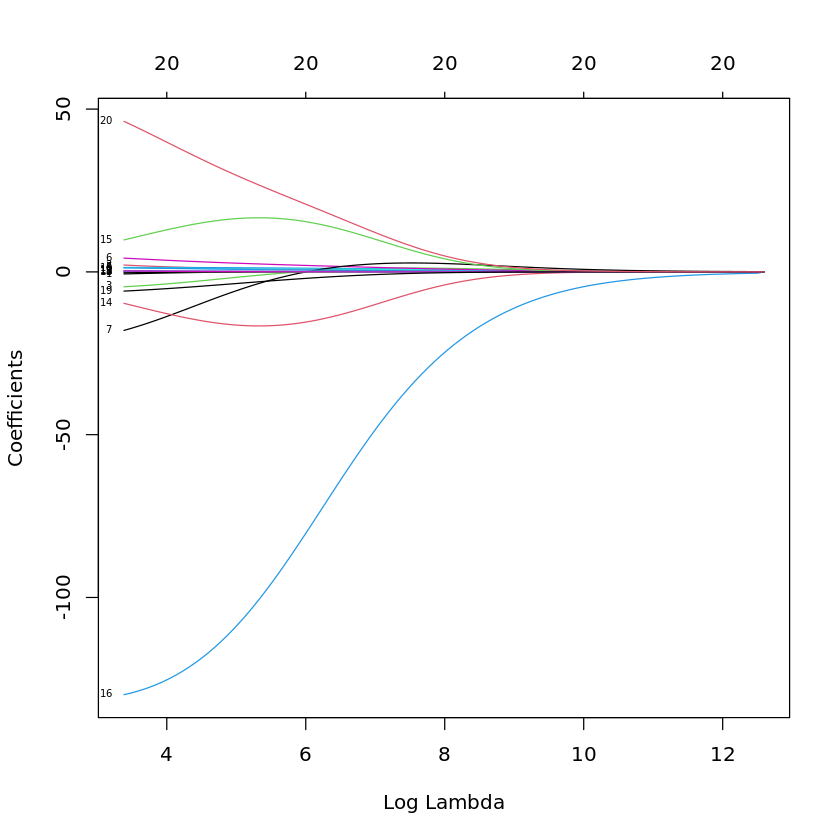

In [7]:


ridge <- glmnet(as.matrix(train[, -ncol(train)]), train$salary, alpha = 0)
# Cross-validate the Ridge model 
plot(ridge, xvar = "lambda", label = TRUE)


## Visualizing Ridge Regression Coefficients: Understanding Regularization

Can you spot what's different here? In this visualization, it's evident that the model retains all variables.


##  Again by cross-validation trade-off, we visualise the Bias variance

The plot is a visualization of model performance metrics as a function of model complexity (lambda penalty in this case for ridge regression), which can be linked to the bias-variance trade-off.
Lower values of lambda correspond to higher complexity (low bias, high variance), and as lambda increases, the model complexity decreases (higher bias, lower variance).
The point where the red line (representing MSE) is at its minimum suggests the optimal balance between bias and variance, minimizing the total expected error.

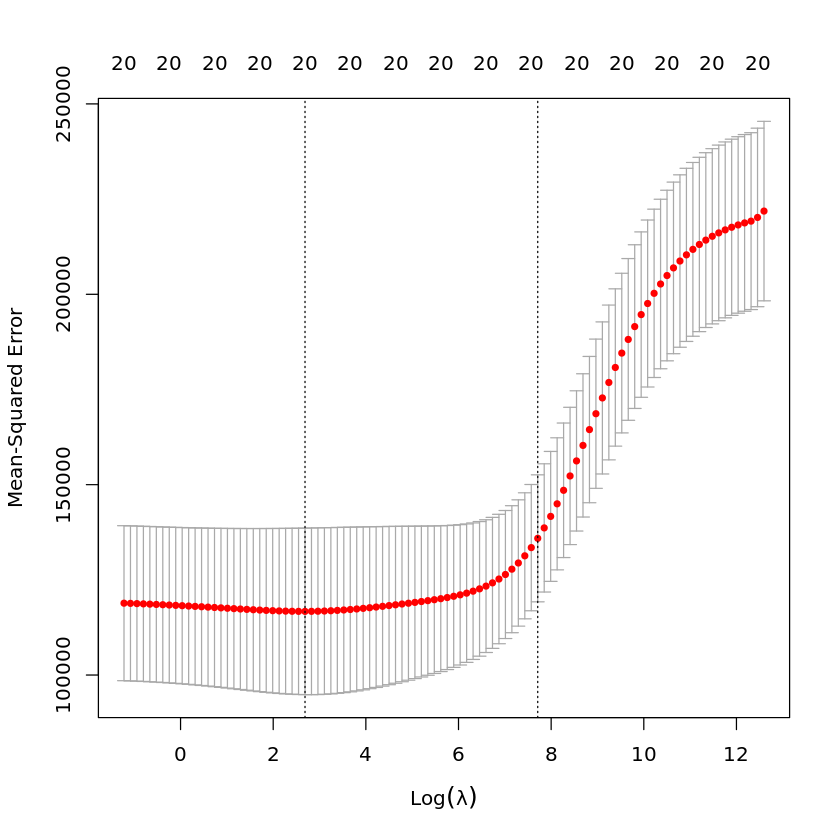

In [8]:
ridge.cv <- cv.glmnet(as.matrix(train[, -ncol(train)]), train$salary, type.measure = "mse", nfolds = 5, alpha = 0, lambda.min.ratio = 0 )
plot(ridge.cv)

In [9]:
# Print Ridge coefficients
print(coef(ridge.cv, s = "lambda.min"))

# Save for later comparison
coef_ridge <- coef(ridge.cv, s = "lambda.min") 

21 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  162.43033465
AtBat         -1.01026117
Hits           2.92503689
HmRun         -4.98568210
Runs           1.13728904
RBI            1.52318201
Walks          4.97698720
Years        -21.02498851
CAtBat        -0.01943496
CHits          0.19656512
CHmRun         1.38373881
CRuns          0.46914358
CRBI           0.34688004
CWalks        -0.42595528
LeagueA       -6.26850959
LeagueN        6.48686862
DivisionW   -131.37019917
PutOuts        0.16842794
Assists        0.31434409
Errors        -6.50580249
NewLeagueN    52.51471656


In contrast to the Lasso model, the Ridge model keeps all control variables. Accordingly, Ridge is suited for dense models. In coparison to OLS, the Ridge coefficients are shrunken towards zero.





## Results and Next Steps

After running the cross-validation, the optimal lambda λ value is stored within `lasso.cv` and can be accessed using `lasso.cv$lambda.min` for the lambda that minimizes MSE, or `lasso.cv$lambda.1se` for the most regularized model within one standard error of the minimum.

Understanding and selecting the optimal lambda allows us to balance model complexity and accuracy, tailoring our Lasso regression model to perform optimally on unseen data.

In the next steps of our analysis, we would use this optimal lambda value to re-estimate our Lasso model or proceed with model evaluation, such as calculating MSE on a test set to gauge the model's prediction accuracy.


In [10]:
# Print the optimal lambda value
print(paste0("Optimal lambda that minimizes cross-validated MSE: ", lasso.cv$lambda.min))
print(paste0("Optimal lambda using one-standard-error-rule: ", lasso.cv$lambda.1se))


print(paste0("Optimal lambda that minimizes cross-validated MSE: ", ridge.cv$lambda.min))
print(paste0("Optimal lambda using one-standard-error-rule: ", ridge.cv$lambda.1se))


[1] "Optimal lambda that minimizes cross-validated MSE: 3.09038156237519"
[1] "Optimal lambda using one-standard-error-rule: 80.1961497682695"
[1] "Optimal lambda that minimizes cross-validated MSE: 14.6818161313071"
[1] "Optimal lambda using one-standard-error-rule: 2231.50550558509"


###  Evaluating Model Performance with Test Sample Mean Squared Error (MSE)

Following the coefficient analysis, we proceed to calculate the Mean Squared Error (MSE) in the test sample. The test sample MSE enables us to assess the performance of our Lasso model on unseen data and compare it with other estimators. By evaluating the model's accuracy on a separate test dataset, we ensure that our Lasso regression model can generalize effectively beyond the training data, providing reliable predictions in practical scenarios.

In [11]:


# Predict using the fitted Lasso model
lasso$predict_outcome <- predict(lasso, newx = as.matrix(test[, -ncol(test)]), s = lasso.cv$lambda.min)

# Calculate the MSE
predMSElasso <- mean((test$salary - lasso$predict_outcome)^2)
print(paste0("MSE: ", predMSElasso))



[1] "MSE: 130313.877940595"


In [12]:
# Predict using the fitted Lasso model
ridge$predict_outcome <- predict(ridge, newx = as.matrix(test[, -ncol(test)]), s = ridge.cv$lambda.min)

# Calculate the MSE
predMSEridge <- mean((test$salary - ridge$predict_outcome )^2)
print(paste0("MSE: ", predMSEridge))

[1] "MSE: 132630.476586086"


# Comparing Regression Models: OLS, Lasso, and Ridge

The output you've observed represents the mean squared error (MSE) values for three different regression models applied to your dataset: Ordinary Least Squares (OLS), Lasso, and Ridge regression. MSE is a common measure used to quantify the error of a model's predictions, where a lower MSE value indicates a model with better predictive accuracy. Below is an explanation of each model's MSE in your output:

- **OLS Regression MSE (138149.8):** This MSE value is associated with the OLS regression model, the simplest form of linear regression that does not apply any regularization. The relatively high MSE suggests that the OLS model might be overfitting or not effectively capturing the underlying data structure.

- **Lasso Regression MSE (130313.9):** Lasso regression, which incorporates an L1 penalty leading to coefficient sparsity (setting some coefficients to zero), shows a slightly improved MSE compared to OLS. This indicates better generalization, likely due to its feature selection effect, which helps in reducing overfitting.

- **Ridge Regression MSE (132630.5):** The MSE for Ridge regression is between the MSEs of OLS and Lasso. Ridge regression uses an L2 penalty to shrink the coefficients but not to zero. This suggests that Ridge regression is effective in predicting the data for this particular scenario.

In essence, this comparison indicates that for the specific dataset and conditions at hand, Lasso regression outperforms both OLS and Ridge regression in terms of predictive accuracy. This underscores the benefit of incorporating regularization techniques, such as L1 penalty, to enhance model performance by mitigating overfitting and dealing more adeptly with multicollinearity.


In [13]:
print(c(predMSEols, predMSElasso, predMSEridge))

[1] 138149.8 130313.9 132630.5


<span style="color:red; font-weight:bold; font-size:xx-large;">
# Time for a breakout session 
</span>
